In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [2]:
data = pd.read_csv('../data/diamonds_train.csv')

## Notebook purpouse

On this notebook, an EDA is performed on a dataset about diamonds main features to know wich of them could affect more to the final price.

## Checking dataset

In [3]:
data.head()

carat        cut color clarity  depth  table  price     x     y     z
0   1.21    Premium     J     VS2   62.4   58.0   4268  6.83  6.79  4.25
1   0.32  Very Good     H     VS2   63.0   57.0    505  4.35  4.38  2.75
2   0.71       Fair     G     VS1   65.5   55.0   2686  5.62  5.53  3.65
3   0.41       Good     D     SI1   63.8   56.0    738  4.68  4.72  3.00
4   1.02      Ideal     G     SI1   60.5   59.0   4882  6.55  6.51  3.95

In [4]:
data.shape

(40455, 10)

In [5]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

* **Carat**:  diamond weigth

* **Cut**:  cut quality

* **Color**:  color

* **Clarity**:  diamond clarity and inclusions

* **Depth**:  realationship between z, x and y: z/mean(x+y). Depth refers to the distance between the culet and the table when the diamond is viewed from the side.

* **Table**:  top horizontal facet, expressed as the relationship with the average girdle diameter. Excellent quality -> 52-62% 

* **Price**  

* **X**:  diamond length

* **Y**:  diamond width

* **Z**:  diamond height

In [6]:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [7]:
# Checking for null values
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [8]:
data.describe()

carat         depth         table         price             x  \
count  40455.000000  40455.000000  40455.000000  40455.000000  40455.000000   
mean       0.797706     61.752841     57.446133   3928.444469      5.729392   
std        0.475544      1.431725      2.233535   3992.416147      1.124453   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    945.000000      4.710000   
50%        0.700000     61.800000     57.000000   2397.000000      5.690000   
75%        1.040000     62.500000     59.000000   5331.000000      6.540000   
max        4.500000     79.000000     95.000000  18823.000000     10.230000   

                  y             z  
count  40455.000000  40455.000000  
mean       5.732819      3.537154  
std        1.146650      0.697062  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.520000  
75%        6.540000      4.035000  
max       58.900000      8.060000

Min value in x,y,z is 0...

In [9]:
# Dropping nosense rows:

x_filter = data['x']==0
y_filter = data['y']==0
z_filter = data['z']==0

data.drop(data[(x_filter | y_filter | z_filter)].index, inplace=True)

In [10]:
# Talking about brilliant cut diamonds, 58.9 as max value for y does not have any sense.
data[data['y']==data['y'].max()]
data.drop(14708, inplace=True)

In [11]:
data.describe()

carat         depth         table         price             x  \
count  40438.000000  40438.000000  40438.000000  40438.000000  40438.000000   
mean       0.797396     61.753084     57.445554   3926.330605      5.729558   
std        0.475226      1.431253      2.233082   3989.861191      1.122337   
min        0.200000     43.000000     43.000000    326.000000      3.770000   
25%        0.400000     61.000000     56.000000    945.000000      4.710000   
50%        0.700000     61.800000     57.000000   2396.000000      5.690000   
75%        1.040000     62.500000     59.000000   5328.750000      6.540000   
max        4.500000     79.000000     95.000000  18823.000000     10.230000   

                  y             z  
count  40438.000000  40438.000000  
mean       5.731582      3.538441  
std        1.114072      0.693283  
min        3.720000      1.070000  
25%        4.720000      2.910000  
50%        5.710000      3.520000  
75%        6.540000      4.040000  
max       10.160000      6.720000

## Price

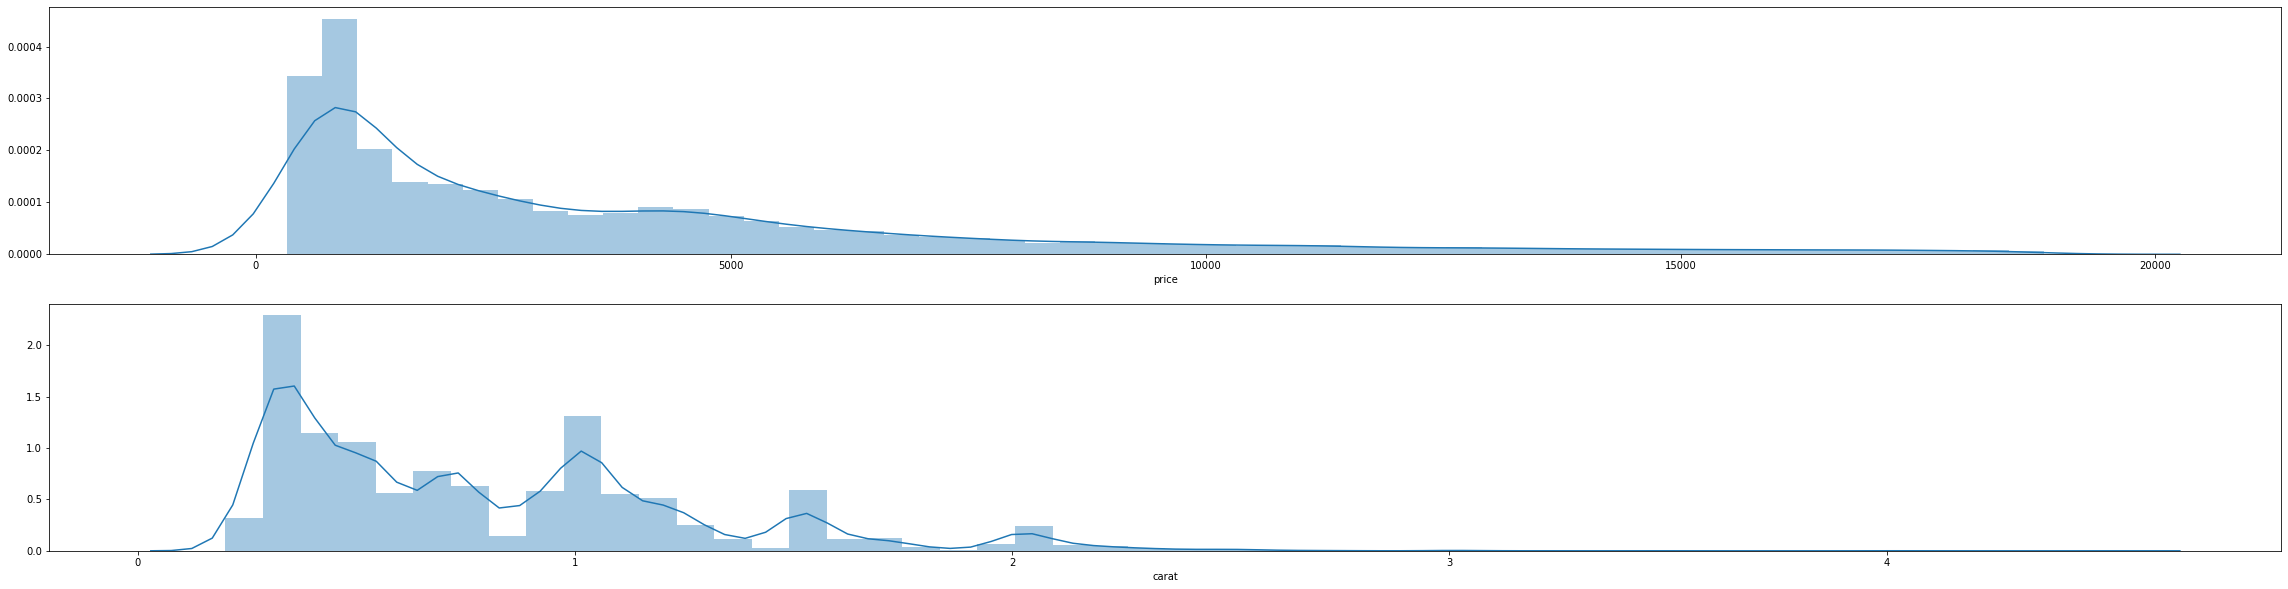

In [12]:
fig, axes = plt.subplots(ncols=1, nrows =2, figsize = (40,10))
sns.distplot(data['price'], ax=axes[0])
sns.distplot(data['carat'], ax=axes[1]);

At first sight, seems that Carat (diamond weitgh) is strong related with the stone price. We will check this later!

## Cut

In [14]:
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']

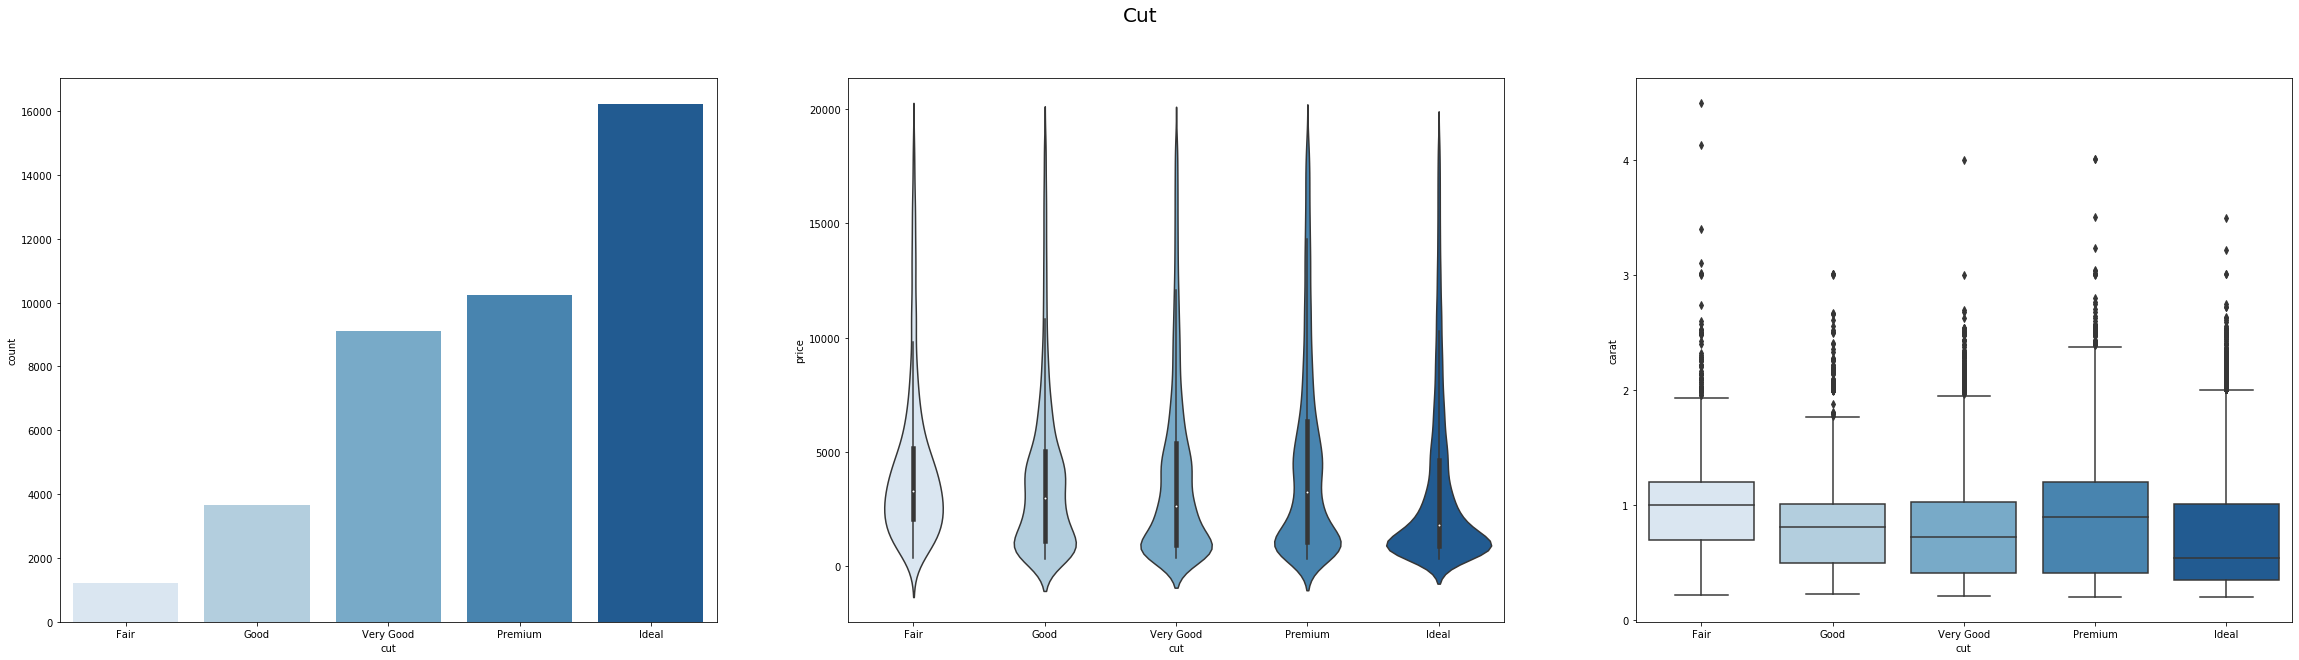

In [15]:
fig, axes = plt.subplots(ncols=3, nrows =1, figsize = (40,10))
fig.suptitle('Cut', fontsize= 20)

sns.countplot( data=data, ax=axes[0],  x='cut',            palette='Blues', order=cut_order)
sns.violinplot(data=data, ax=axes[1],  x='cut', y='price', palette='Blues', order=cut_order)
sns.boxplot(   data= data, ax=axes[2], x='cut', y='carat', palette='Blues', order=cut_order);

- Ideal cut it's the most wanted proportion and because its characteristisc it's more easy to get achived in small diamonds (75% of the Ideal cut diamonds are below 1 carat. It's easier to find small stones without defects and/or more material is wasted during cutting operation)
- Premium cut allows to get bigger stones than Ideal cut.
- Cut has a strong influence in a diamond price. Smaller Ideal or Premium diamonds achieve big prices.

## Color

In [16]:
color_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']

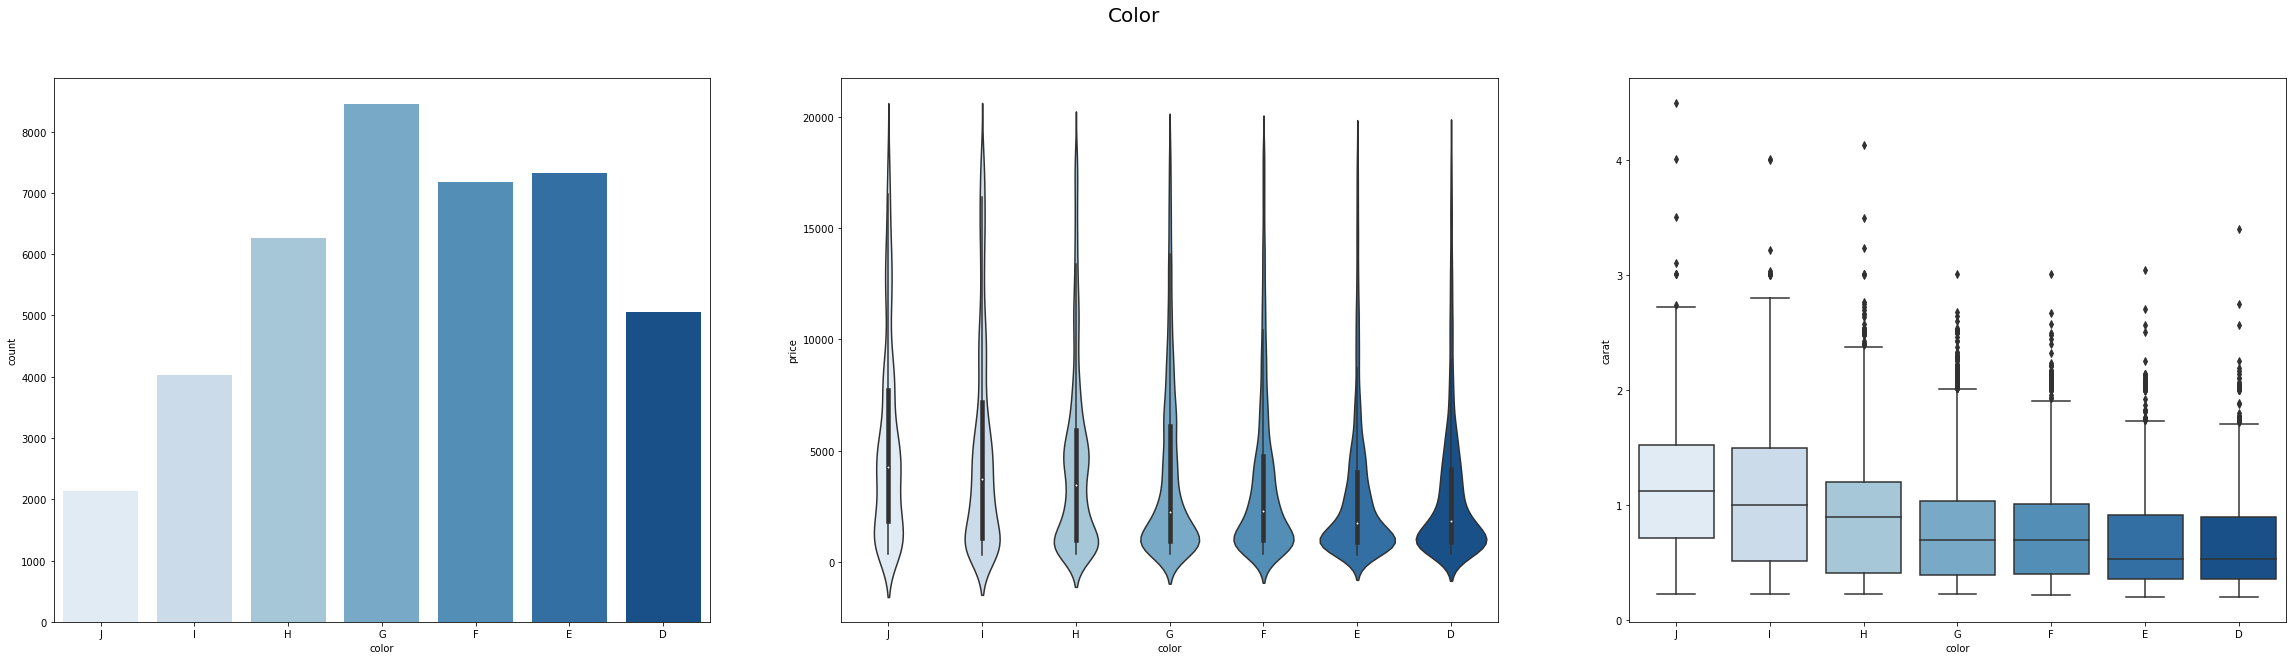

In [17]:
fig, axes = plt.subplots(ncols=3, nrows =1, figsize = (40,10))
fig.suptitle('Color', fontsize= 20)

sns.countplot( data=data, ax=axes[0], x='color',            palette='Blues', order=color_order)
sns.violinplot(data=data, ax=axes[1], x='color', y='price', palette='Blues', order=color_order)
sns.boxplot(   data=data, ax=axes[2], x='color', y='carat', palette='Blues', order=color_order);

- Colorless diamonds ('D-E') are harder to find, what helps to improve price vs smaller weights.
- Worst color categories ('J-I') are less desirable but some times can be big stones. In this cases, high price is due to it's carats not the color.

## Clarity

In [18]:
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

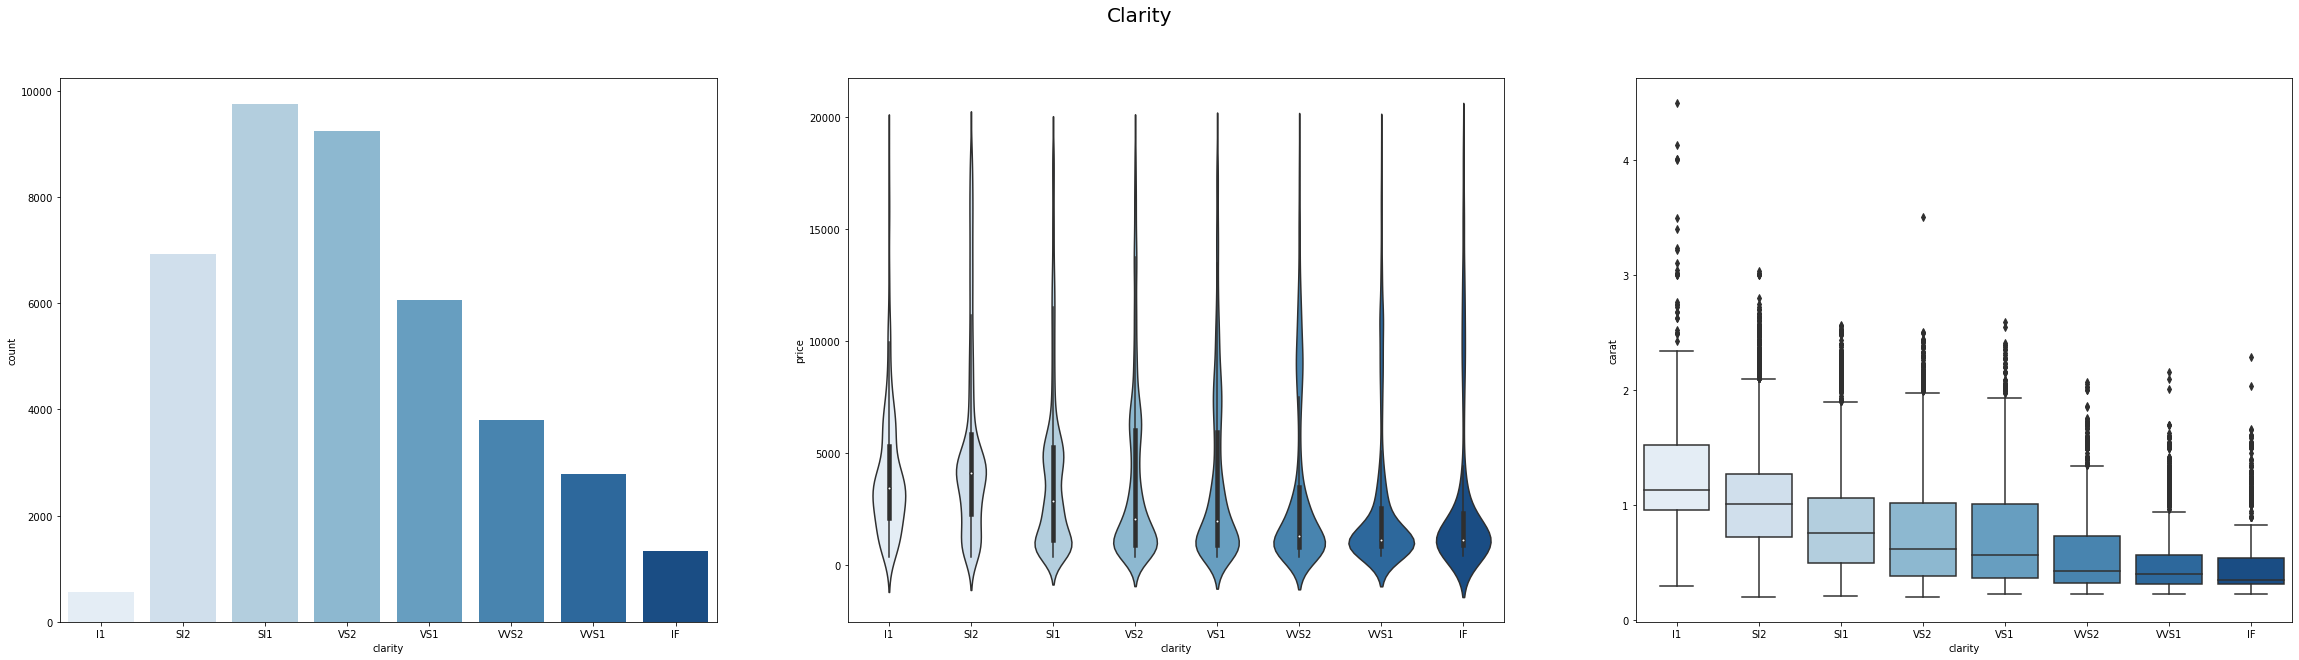

In [19]:
fig, axes = plt.subplots(ncols=3, nrows =1, figsize = (40,10))
fig.suptitle('Clarity', fontsize= 20)

sns.countplot( data=data,  ax=axes[0], x='clarity',            palette='Blues', order=clarity_order)
sns.violinplot(data=data,  ax=axes[1], x='clarity', y='price', palette='Blues', order=clarity_order)
sns.boxplot(   data= data, ax=axes[2], x='clarity', y='carat', palette='Blues', order=clarity_order);

- Internal Flawlees diamons (IF) are difficult too find and usually have small weights, but this feature contributes to increase the price.
- I1 and SI1-2 categories are only acepted beacuse of the stone size.

## Carat

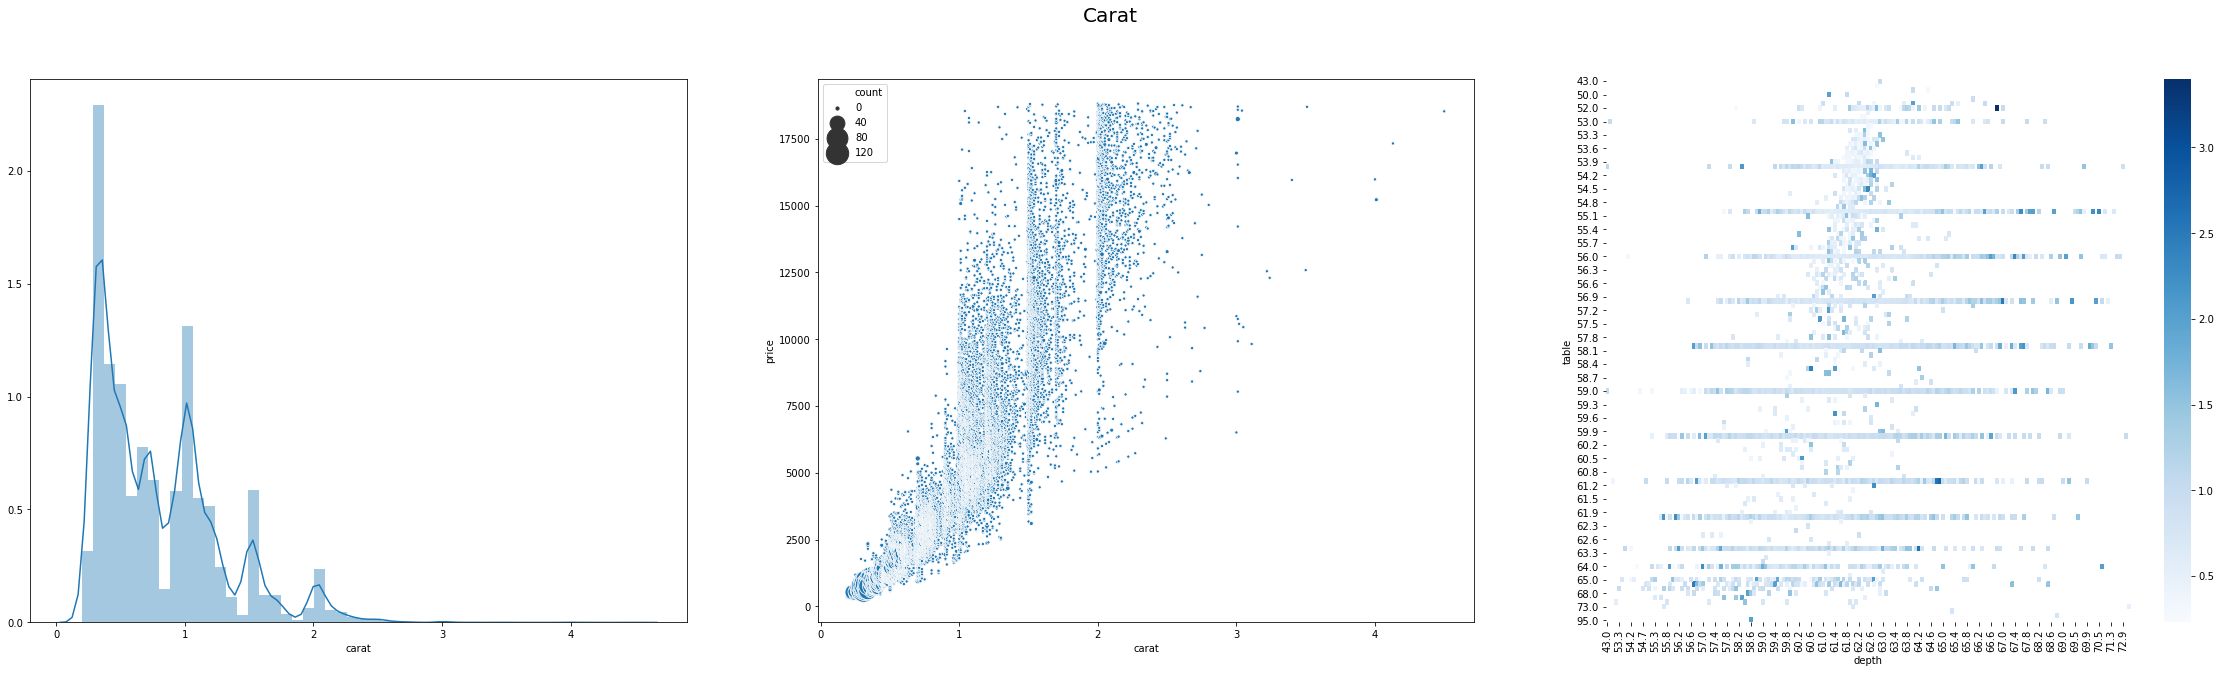

In [39]:
fig, axes = plt.subplots(ncols=3, nrows =1, figsize = (40,10))
fig.suptitle('Carat', fontsize= 20)

sns.distplot(data['carat'], ax=axes[0])


carat_price=data[['carat', 'price', 'cut']].groupby(['carat', 'price']).agg(count=('cut','count')).reset_index()
sns.scatterplot(data=carat_price, ax=axes[1], x='carat', y='price', size='count', palette='Blues',sizes=(10, 500))

carat_depth_table= data[['carat', 'depth', 'table']].pivot_table(index='table', columns='depth', aggfunc='mean')
carat_depth_table.columns = carat_depth_table.columns.droplevel(0)
sns.heatmap(carat_depth_table, ax=axes[2], cmap='Blues');

- This feature has most importan impact over the diamond price. 
- More carats causes a great improve over the stone price since findind big diamonds is quite difficult.
- Althoug certain proportions between table and depth are the msot desirable, this can be skipped if the diamond is big enough.

## Color/Cut/Clarity vs Carat/Avg. Price

In [21]:
# cut_color = data[['color', 'cut', 'price']].pivot_table(index='color', columns='cut', aggfunc='mean')
# cut_color.columns = cut_color.columns.droplevel(0)
# cut_color = cut_color[['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']]
# sns.heatmap(cut_color, annot=True, fmt='.1f', ax=axes[0], cmap='Blues',linewidths=.5)

# cut_clarity = data[['clarity', 'cut', 'price']].pivot_table(index='clarity', columns='cut', aggfunc='mean')
# cut_clarity.columns = cut_clarity.columns.droplevel(0)
# cut_clarity.reindex(['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'])
# cut_clarity = cut_clarity[['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']]
# sns.heatmap(cut_clarity, annot=True, fmt='.1f', ax=axes[1], cmap='Blues',linewidths=.5)

# color_clarity = data[['clarity', 'color', 'price']].pivot_table(index='color', columns='clarity', aggfunc='mean')
# color_clarity.columns = color_clarity.columns.droplevel(0)
# color_clarity = color_clarity[['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']]
# sns.heatmap(cut_clarity, annot=True, fmt='.1f', ax=axes[1], cmap='Blues',linewidths=.5)


In [22]:
cut_carat = data[['carat', 'cut', 'price']].pivot_table(index='carat', columns='cut', aggfunc='mean')
cut_carat.columns = cut_carat.columns.droplevel(0)
cut_carat = cut_carat[['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']]
cut_carat = cut_carat.reindex(index=cut_carat.index[::-1])

In [23]:
color_carat = data[['carat', 'color', 'price']].pivot_table(index='carat', columns='color', aggfunc='mean')
color_carat.columns = color_carat.columns.droplevel(0)
color_carat = color_carat[['J', 'I', 'H', 'G', 'F', 'E', 'D']]
color_carat = color_carat.reindex(index=color_carat.index[::-1])

In [24]:
clarity_carat = data[['clarity', 'carat', 'price']].pivot_table(index='carat', columns='clarity', aggfunc='mean')
clarity_carat.columns = clarity_carat.columns.droplevel(0)
clarity_carat = clarity_carat[['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']]
clarity_carat = clarity_carat.reindex(index=clarity_carat.index[::-1])

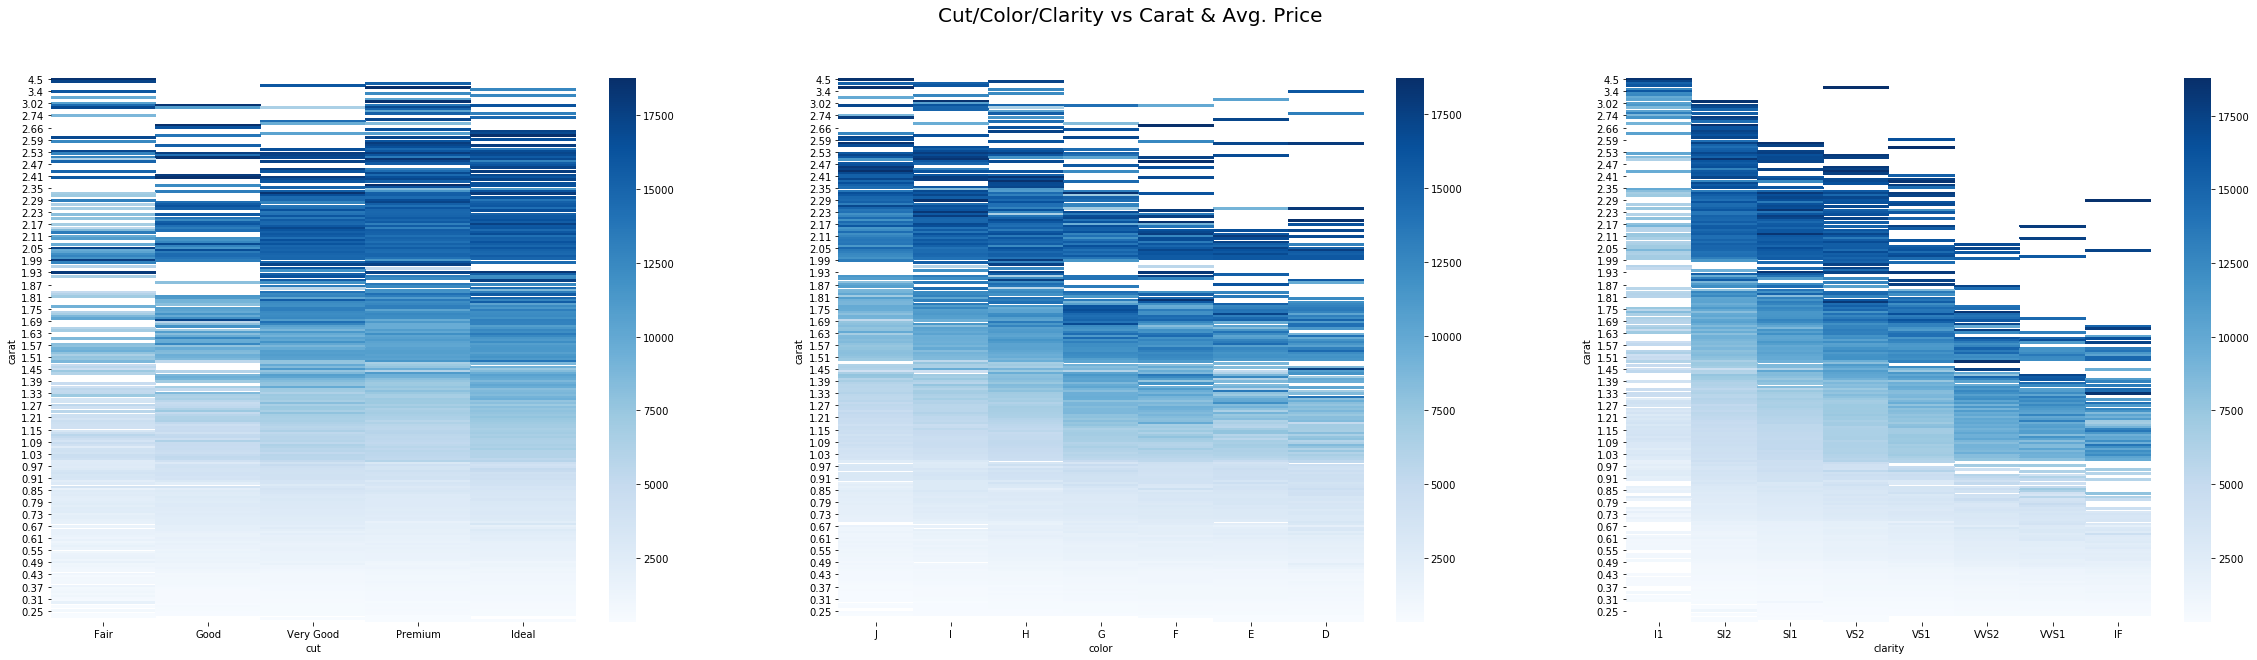

In [46]:
fig, axes = plt.subplots(ncols=3, nrows =1, figsize = (40,10))
fig.suptitle('Cut/Color/Clarity vs Carat & Avg. Price', fontsize= 20)

sns.heatmap(cut_carat,     annot=False, fmt='.1f', ax=axes[0], cmap='Blues')
sns.heatmap(color_carat,   annot=False, fmt='.1f', ax=axes[1], cmap='Blues')
sns.heatmap(clarity_carat, annot=False, fmt='.1f', ax=axes[2], cmap='Blues');

- We can see for each one of the categorical feature (Cut, Color and Clarity) than almost every time, highest avg. prices are related with the biggest sizes.
- Also the high prices for the Ideal and Premium cut shows that its a more apreciated feature when talking about price.

# Dimensions (x,y,z)

In [26]:
data['volume'] = data['x']*data['y']*data['z']

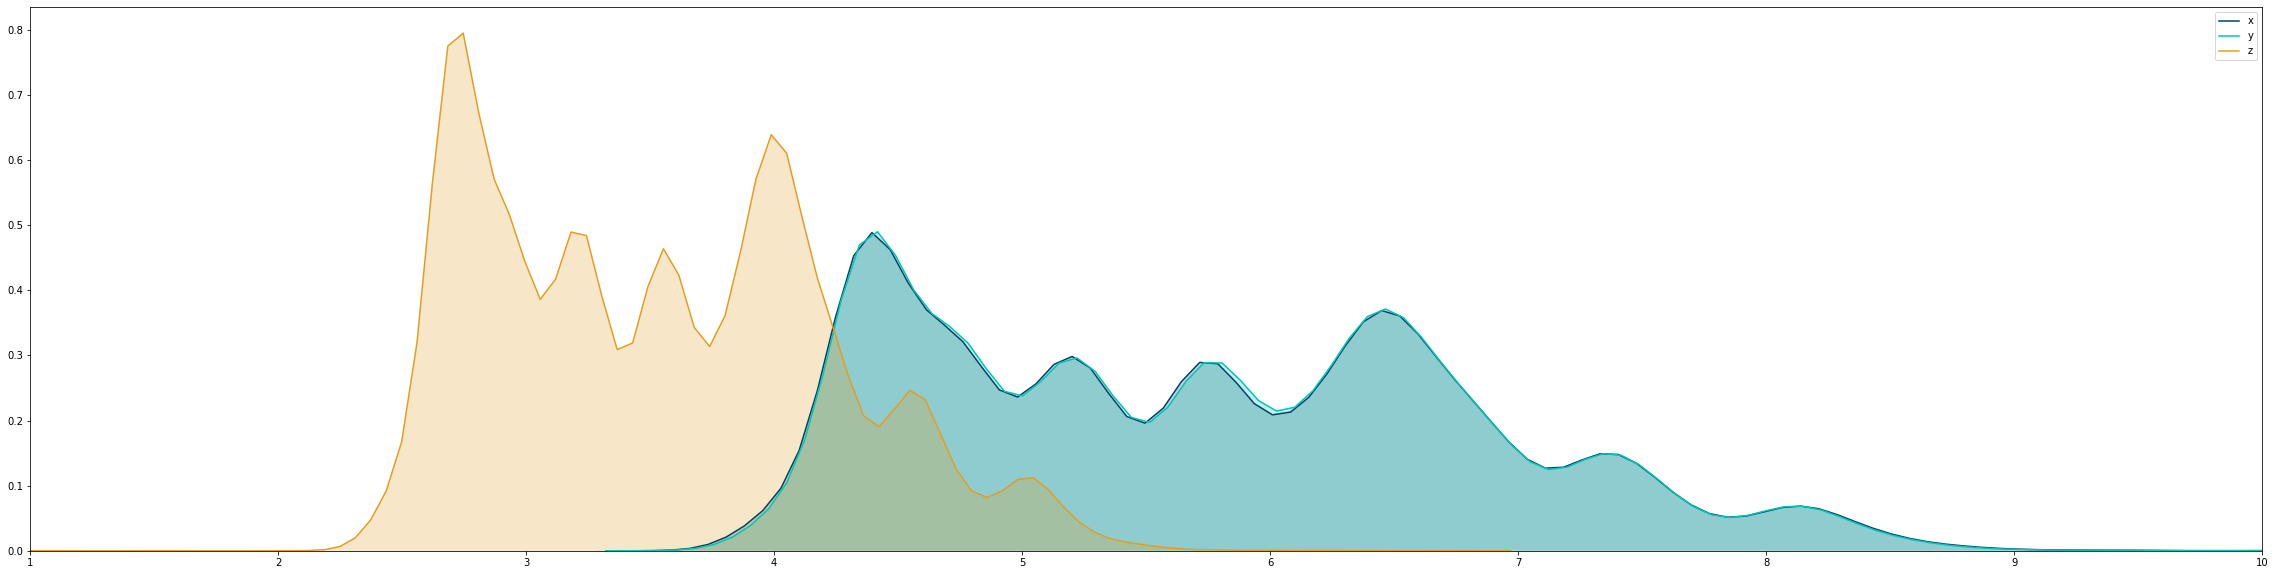

In [47]:
plt.subplots(figsize = (40,10))
plt.xlim(1,10)
sns.kdeplot(data['x'] , shade=True , color='#004165' )
sns.kdeplot(data['y'] , shade=True , color='#00c6b6' )
sns.kdeplot(data['z'] , shade=True , color='#e39e21');

# after dropping y outlier at the beginning of the notebook, x and y are almost identical, which have sense because of the round form of the brilliant cut.

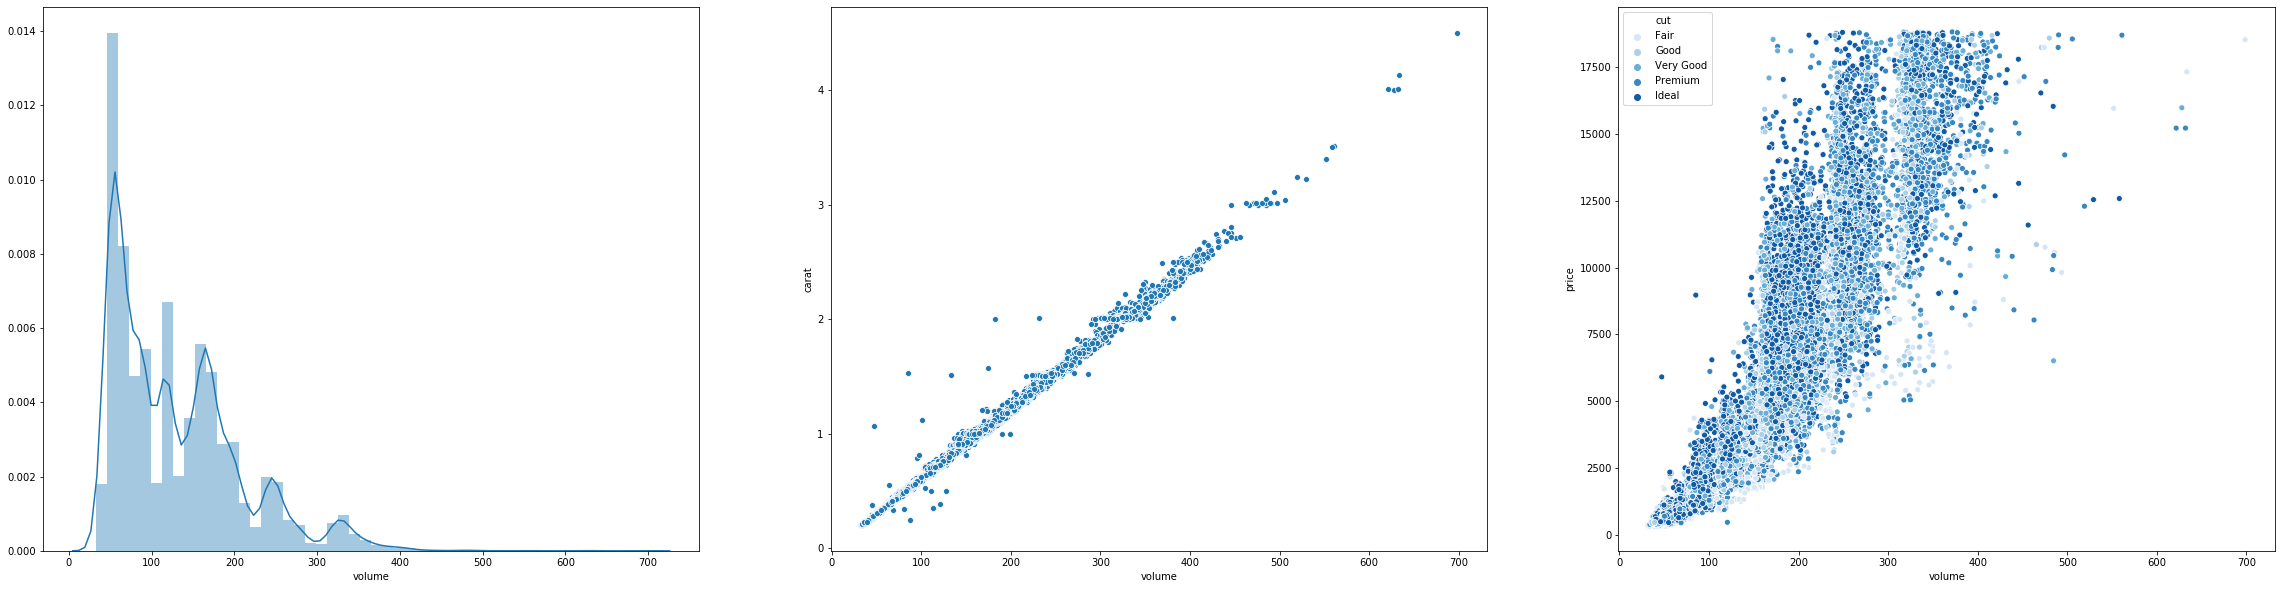

In [28]:
fig, axes = plt.subplots(ncols=3, nrows =1, figsize = (40,10))
sns.distplot(data['volume'], ax=axes[0])
sns.scatterplot(data=data, ax=axes[1], x='volume', y='carat')
sns.scatterplot(data=data, ax=axes[2], x='volume', y='price', hue='cut', hue_order=cut_order, palette='Blues');

# size anda carats are almost equal, so at this point is were cut, color and clarity change the diamond price

- Since diamonds cut follows a proportion rule, x-y-z values can be replaced by the Carat value (wich will equal the volume * diamond density), therefore, we can exclude this values from our analysis.

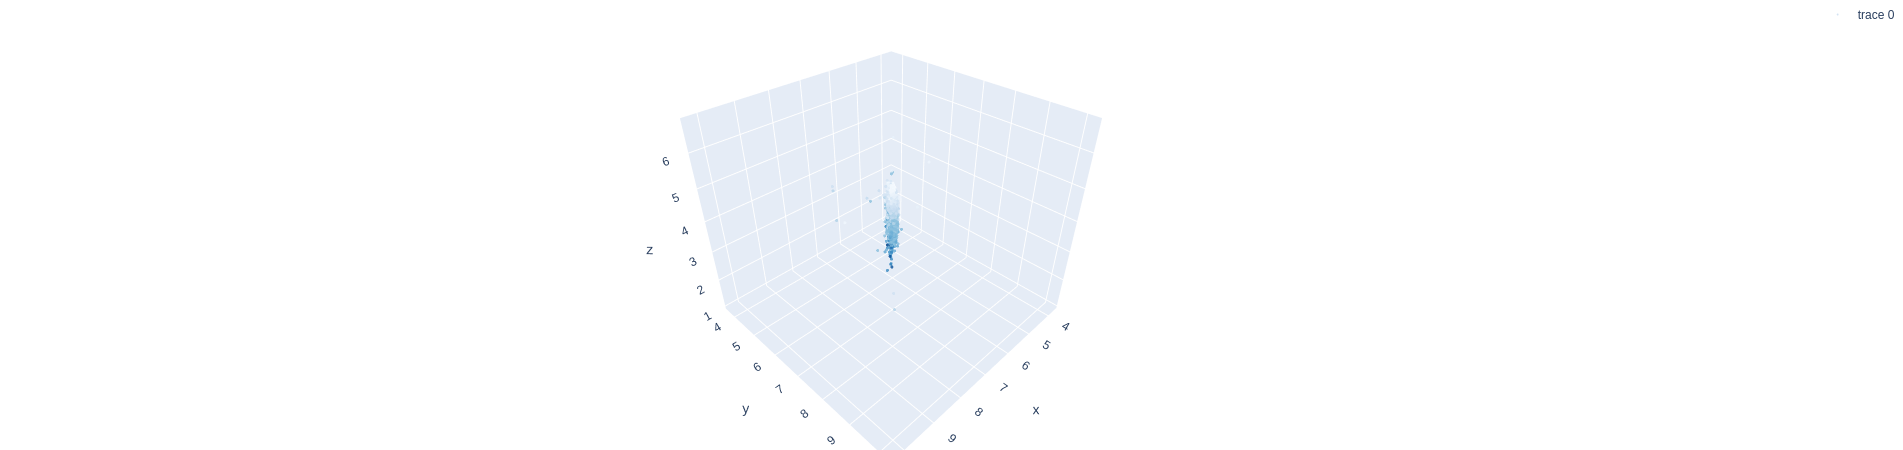

In [35]:
# Let's see it in 3D...

fig = go.Figure(data=[go.Scatter3d(
    x=data['x'],
    y=data['y'],
    z=data['z'],
    mode='markers',
    showlegend=True,
    marker=dict(
        size=1,
        color=data['carat'],                
        colorscale='Blues',   
        opacity=0.8
    )
)])

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

# the darkes the blue, the bigger the price.

## Table and depth

Table is the Width of the Diamond's Table expressed as a Percentage of its Average Diameter.
If the Table (Upper Flat Facet) is too Large then light will not play off of any of the Crown's angles or facets and will not create the Sparkly Rainbow Colors.
If it is too Small then the light will get Trapped and that Attention grabbing shaft of light will never come out but will “leak” from other places in the Diamond.

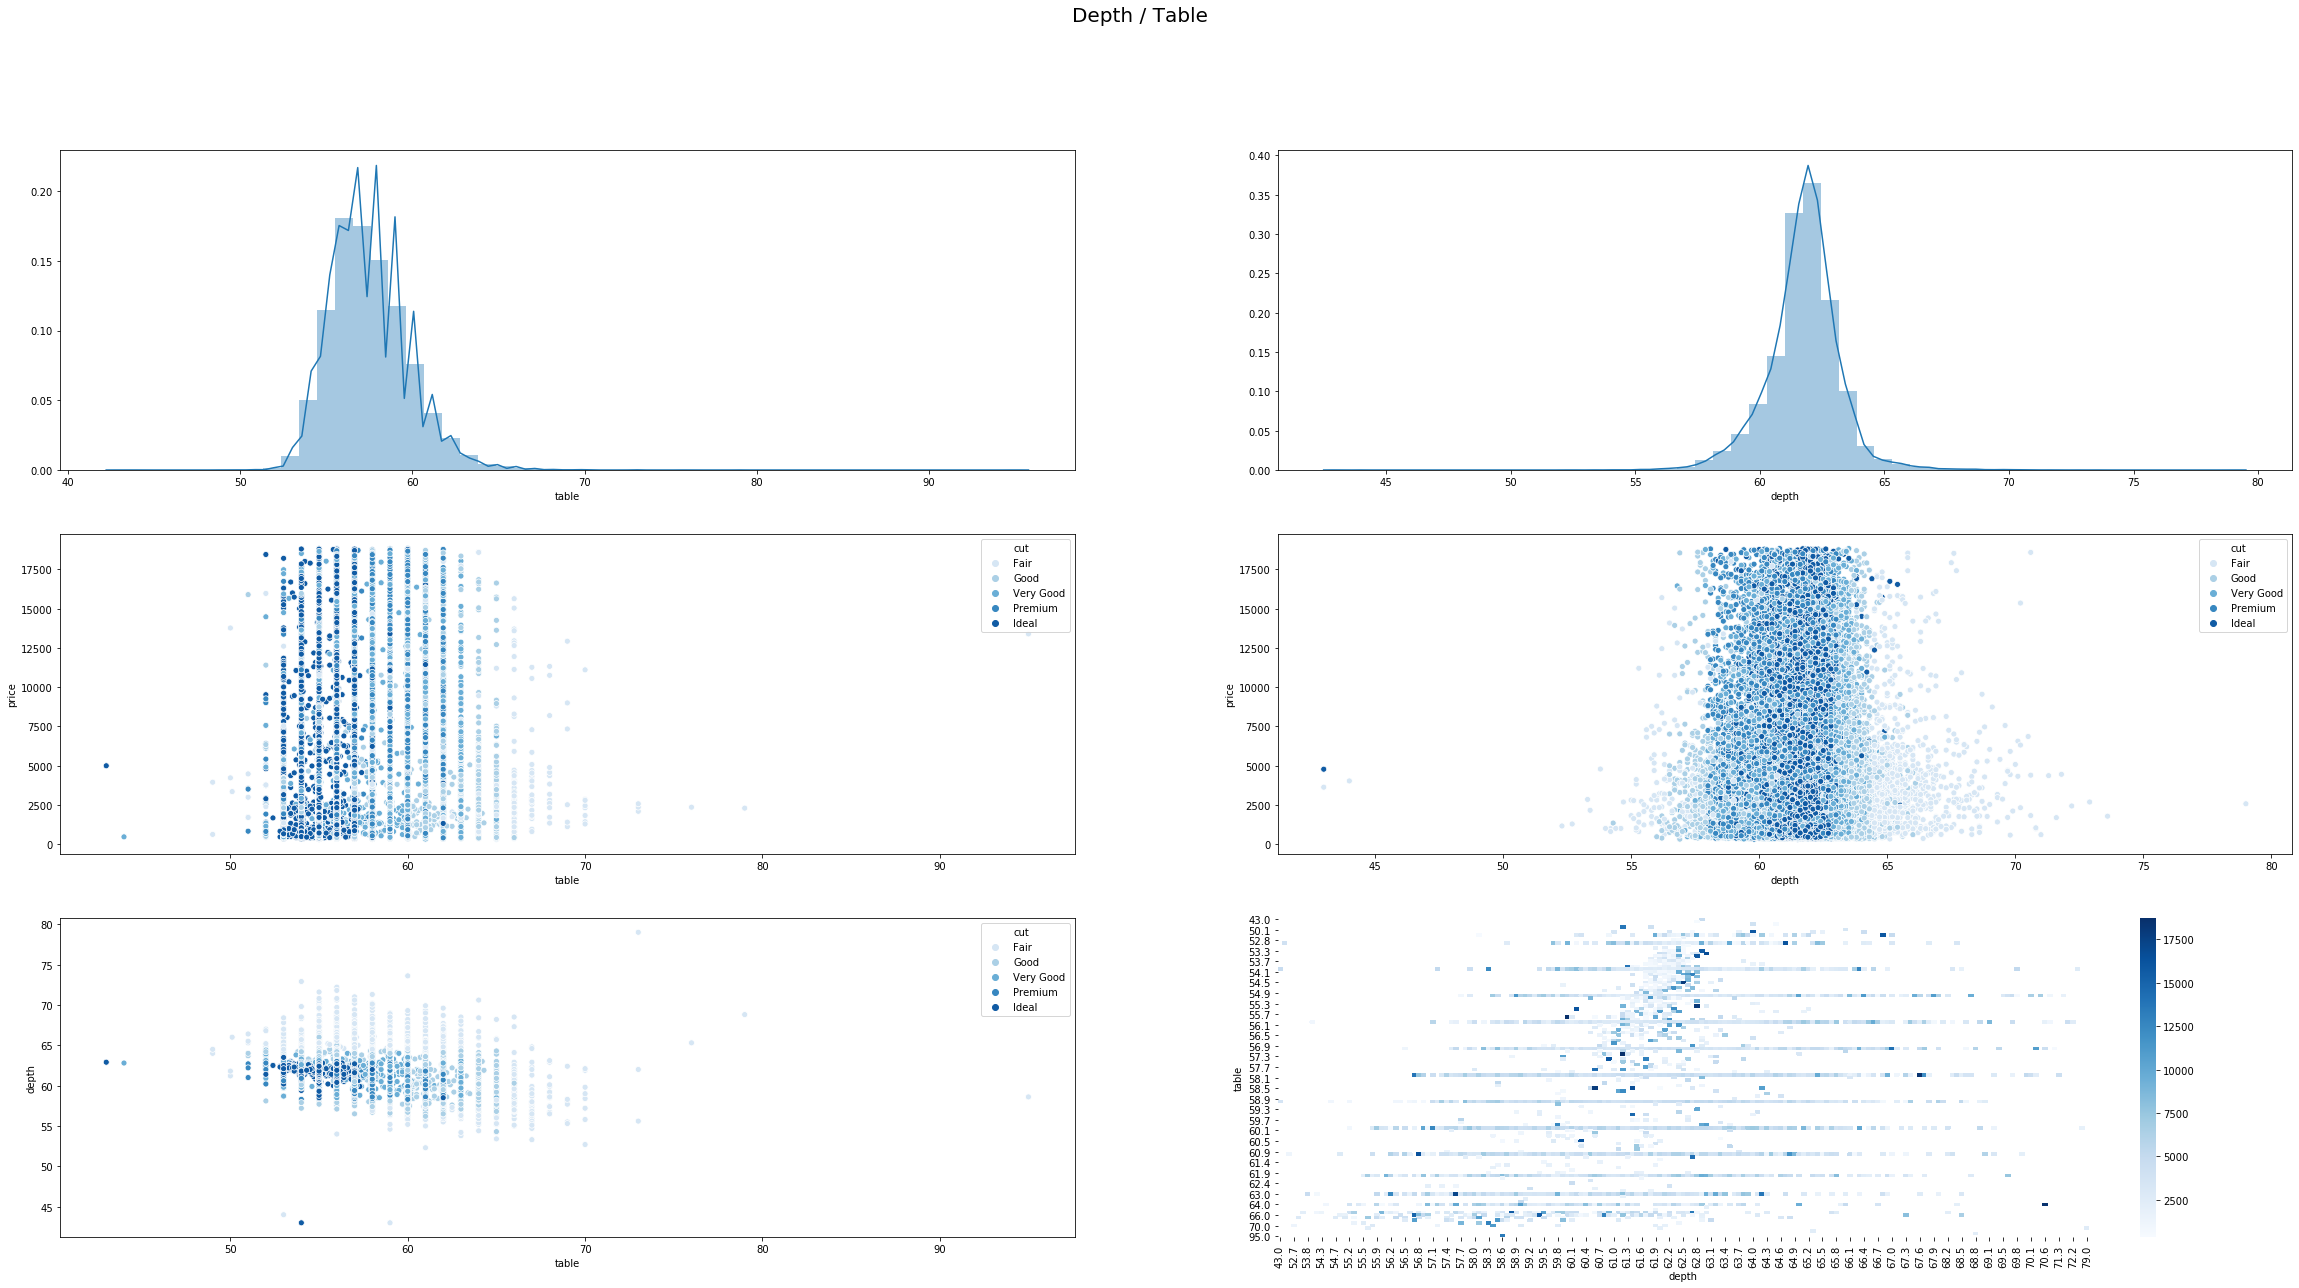

In [31]:
fig, axes = plt.subplots(ncols=2, nrows =3, figsize = (40,20))
fig.suptitle('Depth / Table', fontsize= 20)

sns.distplot(data['table'], ax=axes[0][0])
sns.distplot(data['depth'], ax=axes[0][1])

sns.scatterplot(data = data, ax=axes[1][0],x = 'table', y = 'price', hue='cut', hue_order=cut_order, palette='Blues')
sns.scatterplot(data = data, ax=axes[1][1],x = 'depth', y = 'price', hue='cut', hue_order=cut_order, palette='Blues')

sns.scatterplot(data = data, ax=axes[2][0],x = 'table', y = 'depth', hue='cut', hue_order=cut_order, palette='Blues')

table_depth = data[['table', 'depth', 'price']].pivot_table(index='table', columns='depth', aggfunc='mean')
table_depth.columns = table_depth.columns.droplevel(0)
sns.heatmap(table_depth, ax=axes[2][1], annot=False, fmt='.1f', cmap='Blues');

Both values, Table and Depth are very concentrated around a small range of values, which will be the better aproximation to the ideal proportions of a brilliant cut for a diamond.
Small variations of these values can be useful to disguise some inclusions or crack in the stone. The diamond will have a slighter smaller quality but it can be used.

Ideal and Premium cuts has de narrowest proportion ranges, from we can tell that Cut is a sum of all geometric paramenters (x,y,z, table, depth). 

**Since proportions makes a diamond be 'alive' (sparkling) or 'dead' (muffled) and this is easier to perceive than the Color or the Clarity and helps to improve/cover this features, it's logical that Cut is the feature, after Carat weight, that more influences over the diamond price.**

## Relationships among all variables

In [32]:
# numerical data

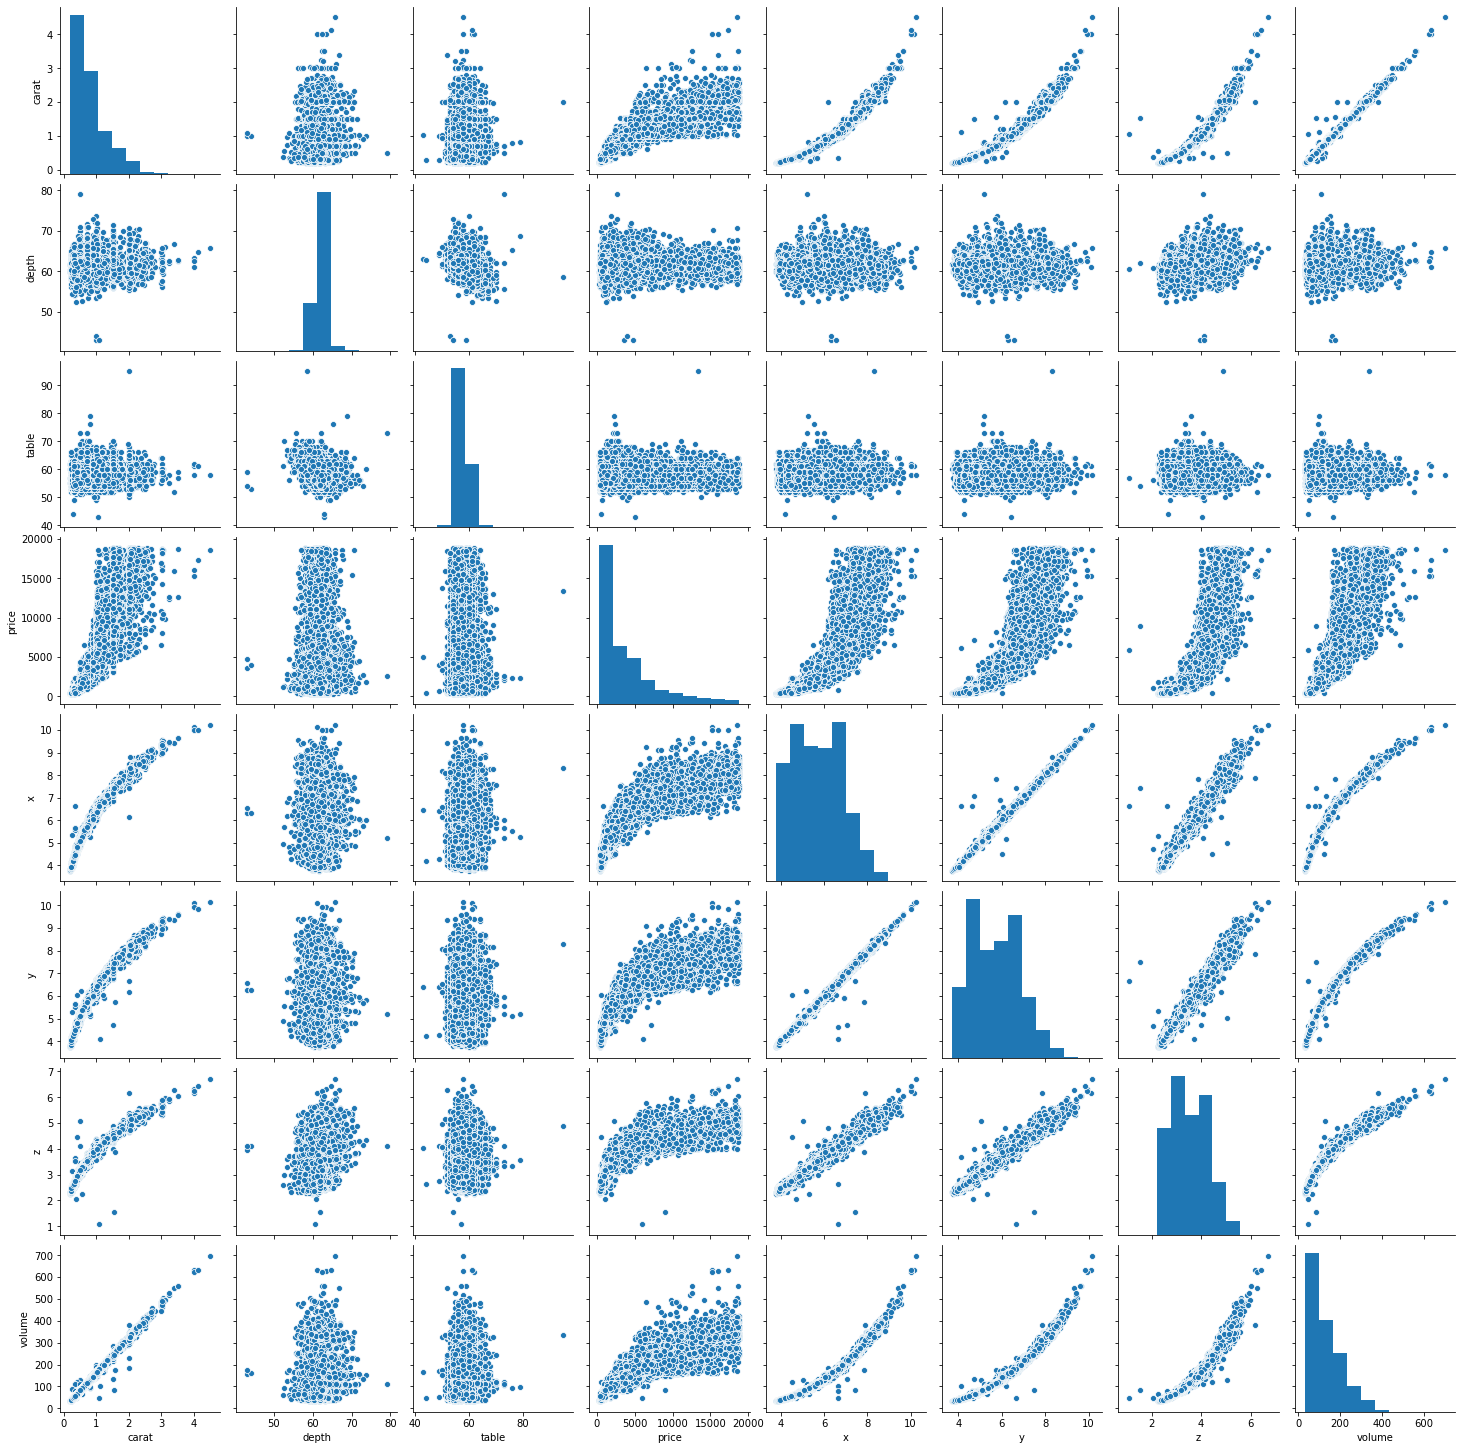

In [33]:
sns.pairplot(data);

- I think I haven't skipped any importan relationship... 

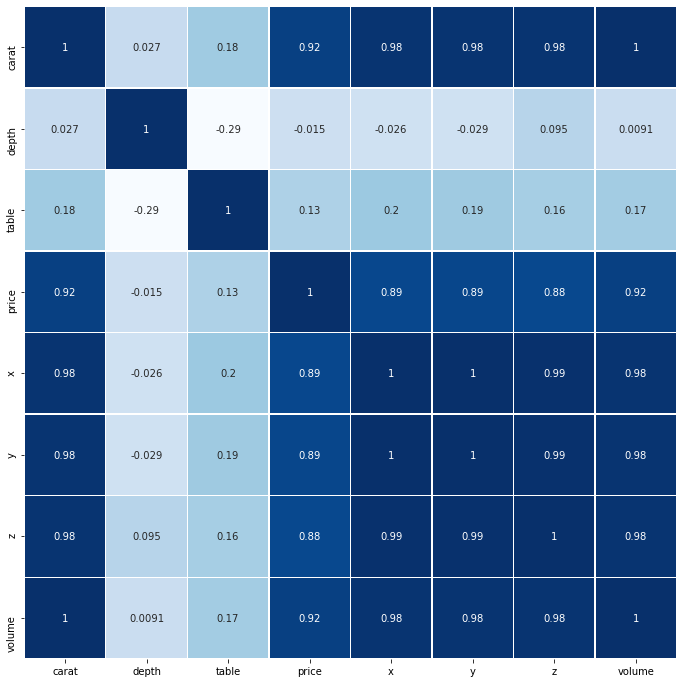

In [34]:
# Correlation matrix:

plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot=True,cmap='Blues',square=True,linewidths=.5, cbar=False);

- X, Y, Z are very related to Carat weight since they conform the diamond volumen.
- Depth is inversely related to X and Y since it correspond to D = z/mean(x+y)

## Carat as a summary of all geometric features is the most important characteristic when talking about price.
## It is followed by Cut parameter.